<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [638]:
import pandas as pd
import re
import json
import requests
from scipy import stats

In [553]:
number_of_pages = 100
#number_of_ads = number_of_pages * per_page

job_title = ["'Analyst' and 'Аналитик'"]

for job in job_title:
    data=[]

    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113',
            'per_page': '10', 
            'page': i,
            'schedule': 'remote'} # удаленка
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        
        df_analyst = pd.DataFrame(columns = list(vacancy_details))
        
        ind = 0
        
        for i in range(len(data)):
            
            for j in range(len(data[i]['items'])):
                df_analyst.loc[ind] = data[i]['items'][j]
                ind+=1

In [554]:
number_of_pages = 100
#number_of_ads = number_of_pages * per_page

job_title = ["'data scientist' or 'data science'"]

for job in job_title:
    data=[]

    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113',
            'per_page': '10', 
            'page': i,
            'schedule': 'remote'} # удаленка
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        
        df_ds = pd.DataFrame(columns = list(vacancy_details))
        
        ind = 0
        
        for i in range(len(data)):
            
            for j in range(len(data[i]['items'])):
                df_ds.loc[ind] = data[i]['items'][j]
                ind+=1

In [681]:
job_title = ['data engineer']

for job in job_title:
    data=[]

    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113',
            'per_page': '10', 
            'page': i,
            'schedule': 'remote'} # удаленка
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        
        df_de = pd.DataFrame(columns = list(vacancy_details))
        
        ind = 0
        
        for i in range(len(data)):
            
            for j in range(len(data[i]['items'])):
                df_de.loc[ind] = data[i]['items'][j]
                ind+=1

In [23]:
# df_analyst = pd.read_csv('Analyst.csv')
# df_de = pd.read_csv('DE.csv')
# df_ds = pd.read_csv('DS.csv')

In [682]:
print('df_analyst', len(df_analyst))
print('df_de', len(df_de))
print('df_ds', len(df_ds))

df_analyst 1000
df_de 702
df_ds 53


In [557]:
df = pd.concat([df_analyst, df_de, df_ds], sort=True)

In [558]:
print('df', len(df))

df 2087


In [559]:
df.drop_duplicates(subset = 'id', keep = 'first', inplace = True)
print('df', len(df))

df 1810


In [661]:
for row in df.itertuples(index=False):
    i = 0
    for el in row:
        i += 1
        print(i, el)
#     print(row)
#     print(row[19])
#     print(type(row[20]))
#     print(type(eval(row[20])))
#     print(json_from(row[19]))
#     print(json_to(row[19]))
#     print(df_avf(row[19]))
    input()

1 False
2 None
3 https://hh.ru/vacancy/50810906
4 https://hh.ru/applicant/vacancy_response?vacancyId=50810906
5 False
6 {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}
7 None
8 2022-01-09T12:48:13+0300
9 None
10 {'id': '3361389', 'name': 'WAZZUP', 'url': 'https://api.hh.ru/employers/3361389', 'alternate_url': 'https://hh.ru/employer/3361389', 'logo_urls': {'90': 'https://hhcdn.ru/employer-logo/3384789.jpeg', '240': 'https://hhcdn.ru/employer-logo/3384790.jpeg', 'original': 'https://hhcdn.ru/employer-logo-original/735953.jpg'}, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=3361389', 'trusted': True}
11 False
12 50810906
13 None
14 Data Analyst
15 False
16 2022-01-09T12:48:13+0300
17 []
18 False
19 None
20 {'from': 90000, 'to': 150000, 'currency': 'RUR', 'gross': False}
21 {'id': 'remote', 'name': 'Удаленная работа'}
22 {'requirement': 'Имеете опыт работы Data <highlighttext>Analyst</highlighttext> от 1 года с аналогичными функциями. Умеете строить дашборды,

KeyboardInterrupt: Interrupted by user

In [623]:
def upper_name(x):
    return x.upper()

def json_from(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['from']

def json_to(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['to']

def json_currency(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['currency']

def requirement(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['requirement']

def responsibility(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['responsibility']

def name(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 'analyst'
    elif 'engineer' in x:
        return 'engineer'
    elif 'scientist' in x:
        return 'scientist'
    elif 'developer' in x:
        return 'developer'
    return None

def name_Analyst(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 1
    return 0

def name_Engineer(x):
    x = x.lower()
    if 'engineer' in x:
        return 1
    return 0

def name_Scientist(x):
    x = x.lower()
    if 'scientist' in x:
        return 1
    return 0

def name_Developer(x):
    x = x.lower()
    if 'developer' in x:
        return 1
    return 0    

def re_pd(x):
    x = re.sub('(.)*(С|с|C|c)истемный (а|a)налитик(.)*', 'Cистемный аналитик', x)
    x = re.sub('^System Analyst(.)*', 'Cистемный аналитик', x)
    
    x = re.sub('(.)*(B|b)usiness(-|\s)? (A|a)nalyst(.)*', 'Бизнес аналитик', x)
    x = re.sub('(.)*(Б|б)изнес(-|\s)?(А|а)налитик(.)*', 'Бизнес аналитик', x)
    
    x = re.sub('^Аналитик$', 'Data Analyst', x)
    x = re.sub('(.)*Старший аналитик(.)*', 'Data Analyst', x)
    x = re.sub('^Ведущий аналитик$', 'Data Analyst', x)
    x = re.sub('(.)*Data Analyst(.)*', 'Data Analyst', x)
    x = re.sub('(.)*Аналитик данных(.)*', 'Data Analyst', x)
    x = re.sub('^Аналитик BI(.)*', 'Data Analyst', x)
    x = re.sub('^Аналитик DWH(.)*', 'Data Analyst', x)
    x = re.sub('^Analyst$', 'Data Analyst', x)
    x = re.sub('^Аналитик, IT Analyst$', 'Data Analyst', x)
    
    x = re.sub('(.)*Product Analyst(.)*', 'Продуктовый аналитик', x)
    
    x = re.sub('(.)*Data engineer(.)*', 'Data Engineer', x)
    x = re.sub('(.)*Data Engineer(.)*', 'Data Engineer', x)
    
    x = re.sub('(.)*Automation Engineer(.)*', 'Тестировщик ПО', x)
    x = re.sub('(.)*Тестировщик ПО(.)*', 'Тестировщик ПО', x)
    
    x = re.sub('(.)*Python Developer(.)*', 'Python Developer', x)
    x = re.sub('(.)*Data scientist(.)*', 'Data Scientist', x)
    x = re.sub('(.)*Data Scientist(.)*', 'Data Scientist', x)
    x = re.sub('(.)*Dev(\s)?Ops(.)*', 'DevOps инженер', x)
    x = re.sub('(.)*Web-аналитик(.)*', 'Web Analyst', x)
    return x

def df_avf(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    a = x['from']
    b = x['to']
    if a == None and b == None:
            return None
    elif b == None:
            return a
    elif a == None:
            return b
    else:
        return (a + b) / 2

In [624]:
df['from'] = df['salary'].apply(json_from)
df['to'] = df['salary'].apply(json_to)
df['requirement'] = df['snippet'].apply(requirement)
df['responsibility'] = df['snippet'].apply(responsibility)

df['currency'] = df['salary'].apply(json_currency)

df['Analyst'] = df['name'].apply(name_Analyst)
df['Engineer'] = df['name'].apply(name_Engineer)
df['Scientist'] = df['name'].apply(name_Scientist)
df['Developer'] = df['name'].apply(name_Developer)

df['name_new'] = df['name'].apply(re_pd)
df['name_upper'] = df['name_new'].apply(upper_name)
df['name_short'] = df['name_upper'].apply(name)

df['mean'] = df['salary'].apply(df_avf)

In [685]:
df_de_new = df_de
df_de_new['from'] = df_de_new['salary'].apply(json_from)
df_de_new['to'] = df_de_new['salary'].apply(json_to)
df_de_new['requirement'] = df_de_new['snippet'].apply(requirement)
df_de_new['responsibility'] = df_de_new['snippet'].apply(responsibility)

df_de_new['currency'] = df_de_new['salary'].apply(json_currency)

df_de_new['name_new'] = df_de_new['name'].apply(re_pd)
df_de_new['name_upper'] = df_de_new['name_new'].apply(upper_name)
df_de_new['name_short'] = df_de_new['name_upper'].apply(name)

df_de_new['mean'] = df_de_new['salary'].apply(df_avf)

In [625]:
df.head()

,accept_temporary,address,alternate_url,apply_alternate_url,archived,area,contacts,created_at,department,employer,...,responsibility,currency,Analyst,Engineer,Scientist,Developer,name_new,name_upper,name_short,mean
0,False,None,https://hh.ru/vacancy/50810906,https://hh.ru/applicant/vacancy_response?vacan...,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,2022-01-09T12:48:13+0300,None,"{'id': '3361389', 'name': 'WAZZUP', 'url': 'ht...",...,Построение дашбордов в BI инструменте. Написан...,RUR,1,0,0,0,Data Analyst,DATA ANALYST,analyst,120000.0
1,False,None,https://hh.ru/vacancy/49769786,https://hh.ru/applicant/vacancy_response?vacan...,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,2022-01-09T00:27:08+0300,None,"{'id': '851716', 'name': 'Novakid Inc', 'url':...",...,"Участвовать в разработке, внедрении и поддержк...",RUR,1,0,0,0,Data Analyst,DATA ANALYST,analyst,220000.0
2,False,None,https://hh.ru/vacancy/50776565,https://hh.ru/applicant/vacancy_response?vacan...,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,2022-01-07T20:51:09+0300,None,"{'id': '5330543', 'name': 'Silverbird', 'url':...",...,Автоматизация процессов AML (скрининг/скоринг ...,RUR,1,0,0,0,Бизнес аналитик,БИЗНЕС АНАЛИТИК,analyst,240000.0
3,True,None,https://hh.ru/vacancy/50815233,https://hh.ru/applicant/vacancy_response?vacan...,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,2022-01-06T22:34:37+0300,None,"{'id': '2918899', 'name': 'Inca Digital', 'url...",...,Collecting data from our internal systems. - L...,USD,1,0,0,0,Junior Business Intelligence Analyst,JUNIOR BUSINESS INTELLIGENCE ANALYST,analyst,1500.0
4,False,None,https://hh.ru/vacancy/49769787,https://hh.ru/applicant/vacancy_response?vacan...,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,2022-01-09T00:27:08+0300,None,"{'id': '851716', 'name': 'Novakid Inc', 'url':...",...,"Участвовать в разработке, внедрении и поддержк...",RUR,1,0,0,0,Data Analyst,DATA ANALYST,analyst,220000.0


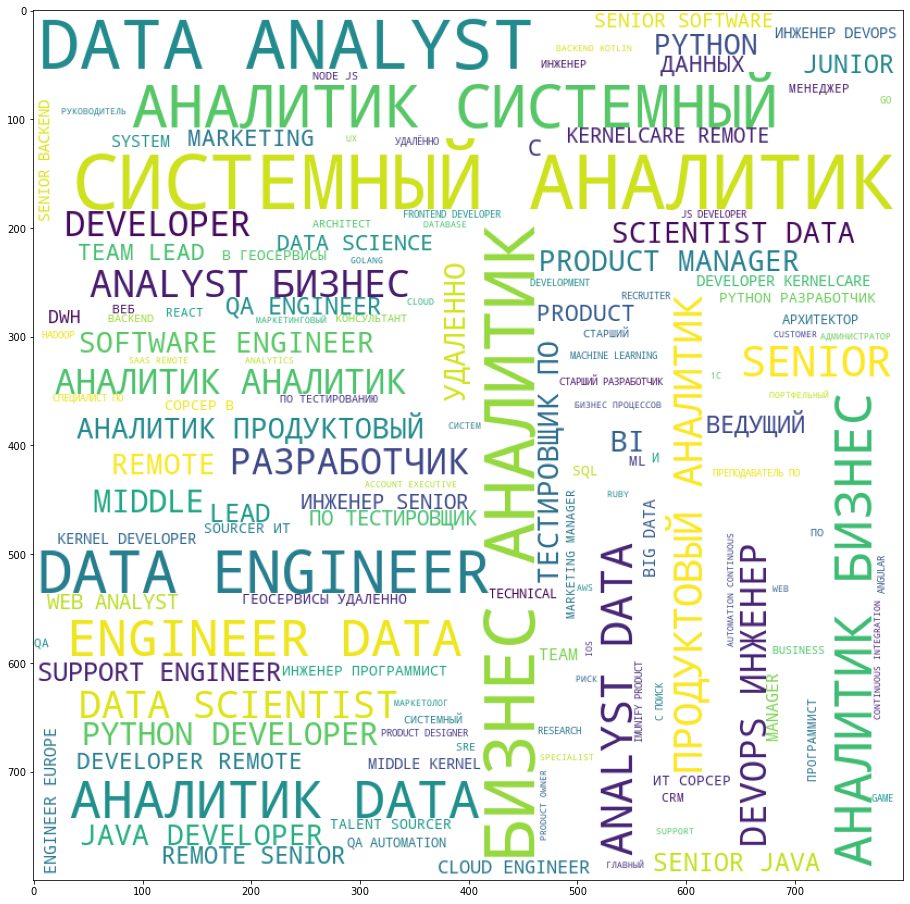

In [565]:
from collections import Counter

vacancy_names = df['name_upper'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += x + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('svod.png')

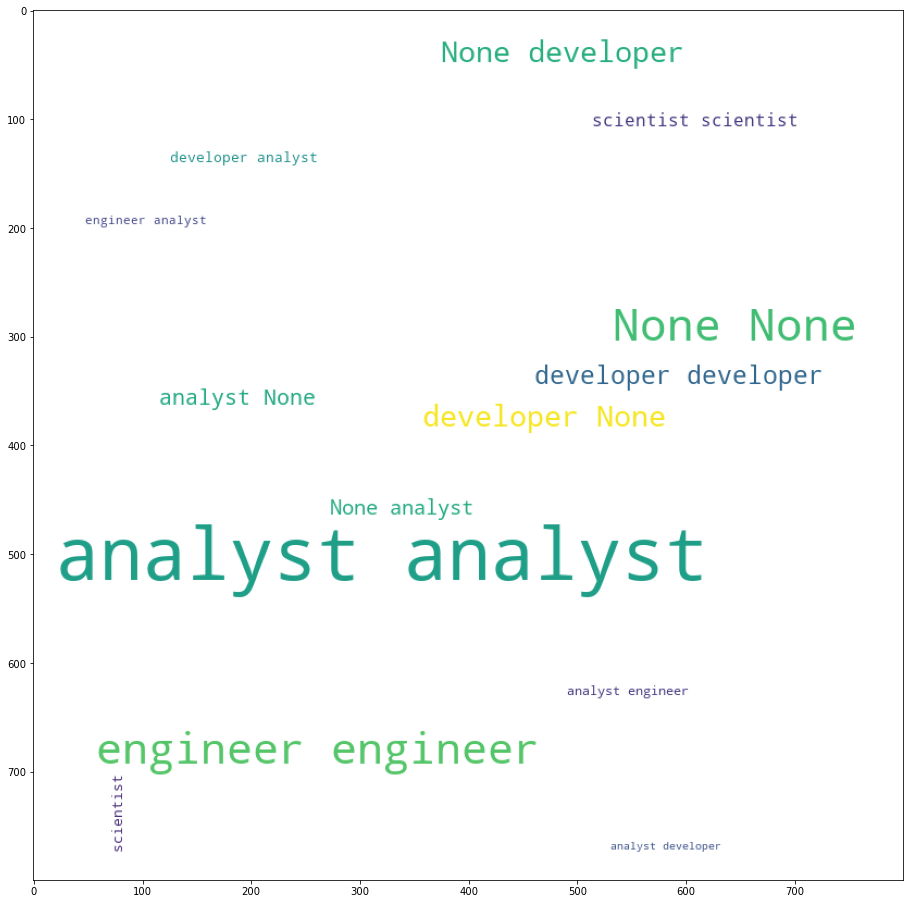

In [567]:
vacancy_names = df['name_short'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('svod_short.png')

In [628]:
analitic = list(df.groupby(['name']).count().sort_values('name_short', ascending=False).head().index)
df.groupby(['name']).count().sort_values('name_short', ascending=False).head()
analitic

['Системный аналитик',
 'Бизнес-аналитик',
 'Аналитик',
 'Data Engineer',
 'Продуктовый аналитик']

In [629]:
list(df.columns.values)

['accept_temporary',
 'address',
 'alternate_url',
 'apply_alternate_url',
 'archived',
 'area',
 'contacts',
 'created_at',
 'department',
 'employer',
 'has_test',
 'id',
 'insider_interview',
 'name',
 'premium',
 'published_at',
 'relations',
 'response_letter_required',
 'response_url',
 'salary',
 'schedule',
 'snippet',
 'sort_point_distance',
 'type',
 'url',
 'working_days',
 'working_time_intervals',
 'working_time_modes',
 'from',
 'to',
 'requirement',
 'responsibility',
 'currency',
 'Analyst',
 'Engineer',
 'Scientist',
 'Developer',
 'name_new',
 'name_upper',
 'name_short',
 'mean']

In [630]:
analitic = list(df.groupby(['name_new']).count().sort_values('name_short', ascending=False).head(5).index)
# df_new.groupby(['name']).count().sort_values('name_short', ascending=False).head()
analitic

['Cистемный аналитик',
 'Бизнес аналитик',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist']

In [631]:
df_analyst5 = df[df['name_new'].isin(analitic)]
df_analyst5 = df_analyst5[['name_new', 'name', 'name_short', 'from', 'to', 'mean', 'currency']]

In [650]:
pd.pivot_table(df_analyst5,
               index = ['name_new', 'currency'], 
               aggfunc = {'mean': [max, min, np.mean, np.median],
                          'name': ['count']})

mean                                     name
                                  max           mean    median       min count
name_new           currency                                                   
Cистемный аналитик EUR         3500.0    3500.000000    3500.0    3500.0     1
                   RUR       525000.0  207510.606061  212500.0   50000.0    66
Data Analyst       RUR       300000.0  141556.219512  135000.0   25000.0    41
                   USD         1000.0    1000.000000    1000.0    1000.0     6
Data Engineer      EUR         4000.0    4000.000000    4000.0    4000.0     1
                   RUR       400000.0  231294.117647  250000.0   90000.0    17
                   USD         6100.0    4700.000000    5000.0    3000.0     3
Data Scientist     EUR         3500.0    3500.000000    3500.0    3500.0     1
                   RUR       350000.0  253636.363636  250000.0  145000.0    11
                   USD         8000.0    4500.000000    3250.0    2250.0     3
Бизнес аналитик    EUR         1500.0    1500.000000    1500.0    1500.0     1
                   RUR       240000.0  128848.888889  120000.0   40000.0    45
                   USD         4250.0    2875.000000    2975.0    1300.0     4

In [657]:
pd.pivot_table(df_analyst5,
               index = ['name_short', 'currency'], 
               aggfunc = {'mean': [max, min, np.mean, np.median],
                          'name': ['count']})

mean                                     name
                          max           mean    median       min count
name_short currency                                                   
analyst    EUR         3500.0    2500.000000    2500.0    1500.0     2
           RUR       525000.0  166432.269737  150000.0   25000.0   152
           USD         4250.0    1750.000000    1000.0    1000.0    10
engineer   EUR         4000.0    4000.000000    4000.0    4000.0     1
           RUR       400000.0  231294.117647  250000.0   90000.0    17
           USD         6100.0    4700.000000    5000.0    3000.0     3
scientist  EUR         3500.0    3500.000000    3500.0    3500.0     1
           RUR       350000.0  253636.363636  250000.0  145000.0    11
           USD         8000.0    4500.000000    3250.0    2250.0     3

In [689]:
# df_analyst5

In [690]:
de = [ 'Data Engineer']
dsde = df[df['name_new'].isin(de)]
# dfde[['requirement']]

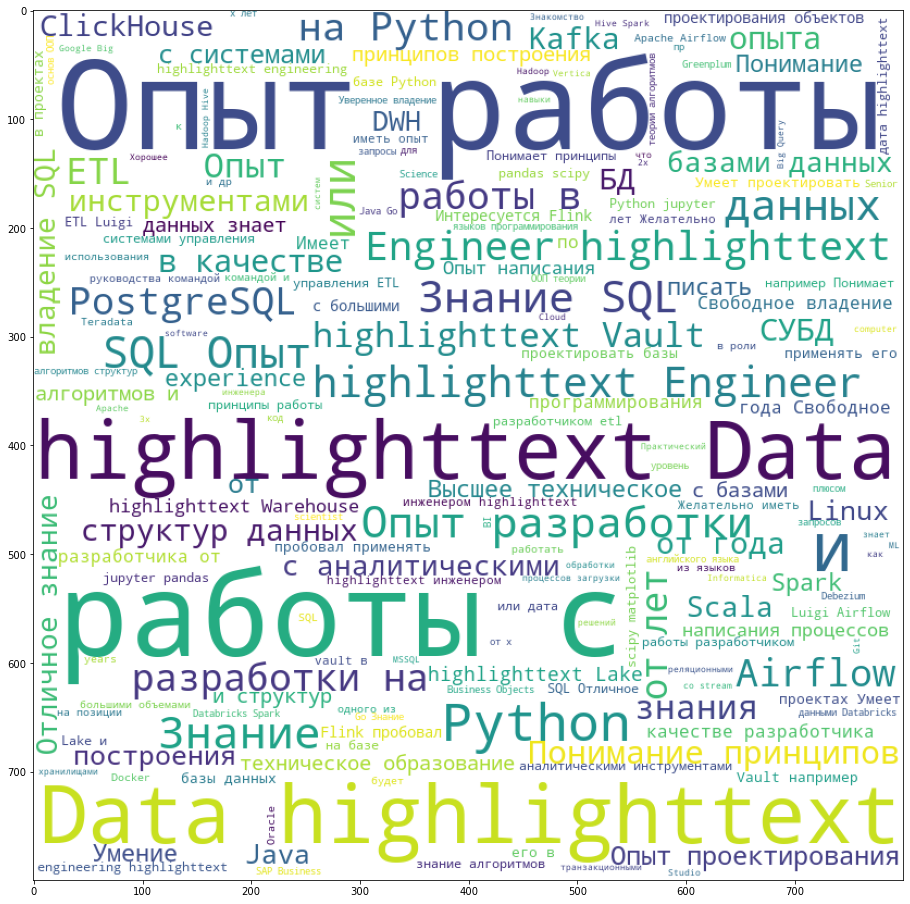

In [671]:
vacancy_names = dfde['requirement'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DE_requirement.png')

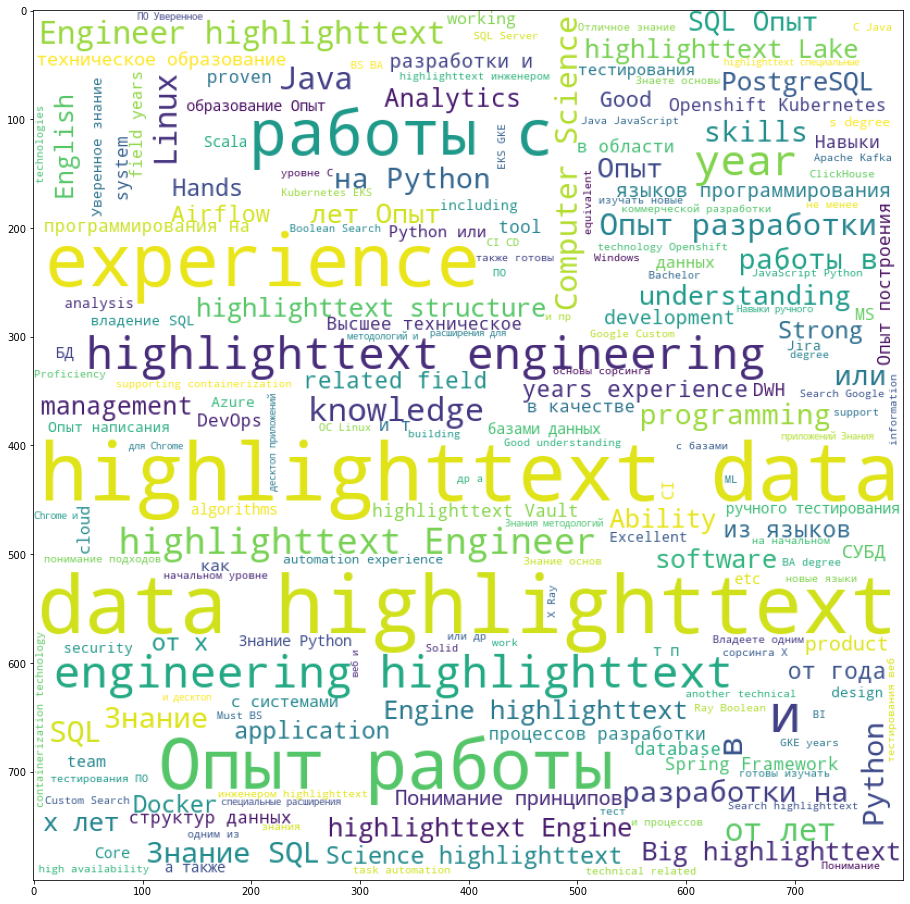

In [686]:
vacancy_names = df_de_new['requirement'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DE_requirement.png')

In [688]:
ds = ['Data Scientist']
dfds = df[df['name_new'].isin(ds)]
# dfds[['requirement']]

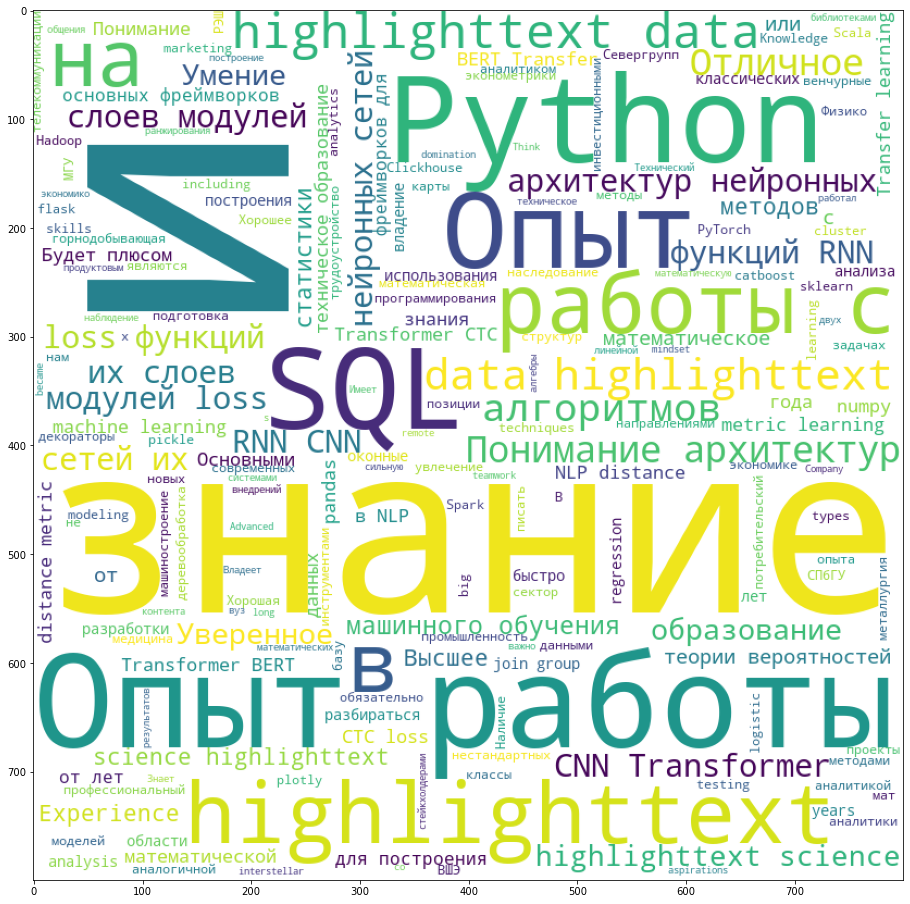

In [678]:
vacancy_names = dfds['requirement'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DS_requirement.png')

In [679]:
da = [ 'Data Analyst']
dfda = df[df['name_new'].isin(da)]
dfda[['requirement']]

,requirement
0,Имеете опыт работы Data <highlighttext>Analyst...
1,Высшее техническое образование (будет плюсом)....
4,Высшее техническое образование (будет плюсом)....
6,"Python 3. Знание библиотек NumPy, Pandas, requ..."
7,"понимать, моделировать и анализировать LTV, RO..."
...,...
908,Понимание принципов построения Корпоративных Х...
919,Необходимый опыт работы: более 2 лет товарным ...
38,"Знание математических алгоритмов ML, основных ..."
235,Разработка и внедрение метрик образовательного...


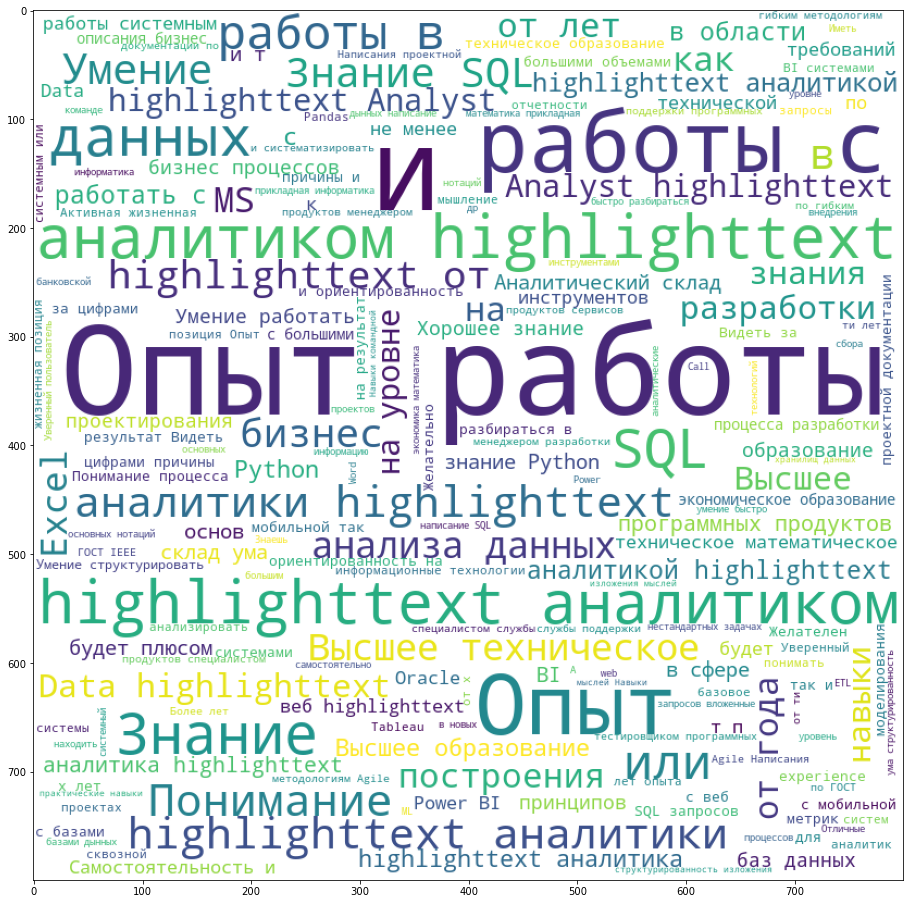

In [680]:
vacancy_names = dfda['requirement'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DS_requirement.png')

In [691]:
# df_de_new
analitic = list(df_de_new.groupby(['name_new']).count().sort_values('name_short', ascending=False).head(5).index)
analitic

['Data Engineer',
 'Data Scientist',
 'Python Developer',
 'Data Analyst',
 'Cloud Engineer (Europe)']

In [692]:
df_de5 = df[df['name_new'].isin(analitic)]
df_de5 = df_de5[['name_new', 'name', 'name_short', 'from', 'to', 'mean', 'currency']]

In [693]:
pd.pivot_table(df_de5,
               index = ['name_new', 'currency'], 
               aggfunc = {'mean': [max, min, np.mean, np.median],
                          'name': ['count']})

mean                                     \
                                       max           mean    median       min   
name_new                currency                                                
Cloud Engineer (Europe) USD         8000.0    8000.000000    8000.0    8000.0   
Data Analyst            RUR       300000.0  141556.219512  135000.0   25000.0   
                        USD         1000.0    1000.000000    1000.0    1000.0   
Data Engineer           EUR         4000.0    4000.000000    4000.0    4000.0   
                        RUR       400000.0  231294.117647  250000.0   90000.0   
                        USD         6100.0    4700.000000    5000.0    3000.0   
Data Scientist          EUR         3500.0    3500.000000    3500.0    3500.0   
                        RUR       350000.0  253636.363636  250000.0  145000.0   
                        USD         8000.0    4500.000000    3250.0    2250.0   
Python Developer        RUR       300000.0  224166.666667  231250.0  125000.0   
                        USD         4250.0    4250.000000    4250.0    4250.0   

                                  name  
                                 count  
name_new                currency        
Cloud Engineer (Europe) USD         11  
Data Analyst            RUR         41  
                        USD          6  
Data Engineer           EUR          1  
                        RUR         17  
                        USD          3  
Data Scientist          EUR          1  
                        RUR         11  
                        USD          3  
Python Developer        RUR          6  
                        USD          1